<img style="float: right; margin: 0px 0px 15px 15px;" src="http://diariomontecristo.com/wp-content/uploads/2012/07/Tierra-Nocturna.jpg" width="300px" height="100px" />

<font color = red>

# Ecuaciones del movimiento planetario

<font color = purple>

## 1. Objetivos

<font color = blue>

### 1.1 Objetivo general
<font color = black> 
> - Describir sistemas planetarios específicos, graficando sus ecuaciones de movimiento para observar sus órbitas.

<font color = blue> 

### 1.2 Objetivos específicos

<font color = black> 
> - Examinar el caso de un sistema solar con un sol y un cuerpo en una sola dimensión.
> - Analizar el mismo sistema anterior pero en dos dimensiones.
> - Estudiar lo que sucede con dos soles en dos dimensiones. 


<font color = purple>

## 2. Antecendentes

<font color = black>


Desde la Antigua Grecia ya se conocían 5 planetas: Mercurio, Venus, Marte, Júpiter y Saturno, además del nuestro. **Ptolomeo de Alejandría** establece un sistema en el que la Tierra ocuparía el centro del Universo y en torno a ella se moverían los demás cuerpos celestes describiendo órbitas circulares, con el modelo conocido como geocéntrico. 

Ya en 280 A.C. **Aristarco de Samos** (310-250 A.C.), un astrónomo griego, razonó que la Tierra rotaba sobre su eje cada 24 horas y que, junto con los otros planetas, se movían alrededor del sol cada año (modelo heliocéntrico). Su propuesta no fue tomada en serio ya que la idea de que la Tierra era el centro del universo estaba arraigada a las creencias religiosas de la época.

No fue sino hasta el siglo XVI que **Nicolás Copérnico** (1546-1601) retomó la proposición de Aristarco, considerando nuevamente que todos los planetas, incluida la Tierra, giraban en torno al Sol el cual estaría en el centro de sus órbitas. Copérnico es a quien se le da crédito en la historia de la ciencia por el modelo heliocéntrico.

![hc](https://www.astronomia-iniciacion.com/images/copernico-sistema.gif)

**Johannes Kepler** (1571-1630) continuó con el trabajo de Copérnico; se basó también en el trabajo experimental del astrónomo danés Tycho Brache (1546-1601). Kepler afirmó que los planetas describen órbitas elípticas (en lugar de circulares que era como se concebían en los modelos anteriores) alrededor del sol.  Finalmente,  todo esto llevó al astrónomo a plantear las leyes del movimiento planetario, las cuales son tres y fueron formuladas entre 1609 y 1619:

1.	Los planetas se mueve alrededor del Sol en elipses, estando el Sol en un foco.
2.	El radio-vector que conecta al Sol con un planeta recorre áreas iguales en tiempos iguales.
3.	El cuadrado del período orbital de un planeta es proporcional al cubo de la distancia media desde el Sol (semieje mayor).

![hc](https://espaciociencia.com/wp-content/uploads/2010/10/leyes-de-kepler.png)

**Galileo Galilei** refuerza la teoría de Copérnico justificándola con sus resultados experimentales. El hecho de que las lunas de Júpiter giren en torno a él implica en primer lugar que no todo gira en torno a la Tierra. Su vehemencia a la hora de seguir defendiendo la teoría heliocéntrica le llevó a serios problemas teniendo que enfrentarse a una condena de la Inquisición y a un arresto en su casa de las afueras de Florencia.

Las ideas de Aristarco, restauradas por Copérnico y avanzadas por Kepler, culminaron su desarrollo con el genio de **Isaac Newton** (1642-1727). Con los descubrimientos empíricos de Kepler, Newton se esforzó en responder dos cuestiones fundamentales: 

* Qué fuerzas causan que los planetas se muevan alrededor del sol
* Por qué las órbitas son elípticas

De esta manera, en su libro *“Principia”*  describió la *Ley de la Gravitación Universal*, además de que estableció las bases de la mecánica clásica mediante las leyes que llevan su nombre.  


<font color = purple>

## 3. Modelo

<font color = blue>

### Ley de la gravitación universal 

<font color = black>

Newton percibía que los objetos eran atraídos hacia el suelo por alguna fuerza aceleradora. Después de un razonamiento, demostró que la gravedad sigue la ley del inverso del cuadrado: la fuerza de la gravedad disminuye con el cuadrado de la distancia de un cuerpo. 

Esta ley explicaba en una ecuación las órbitas de todos los planetas como se describen en las tres leyes de Kepler. La ley de Newton predecía que viajaban más rápido cerca del sol (ya que la fuerza gravitatoria era mayor) a medida que seguían trayectorias elípticas

![manzana](http://estaticos.muyhistoria.es/rcs/articles/3498/newton-manzana.jpg)

"Entre dos objetos de masas $m$ y $M$, respectivamente, a una distancia $r$ uno de otro, existe una fuerza atractiva $F$ cuya magnitud es proporcional a cada una de las dos masas e inversamente proporcional al cuadrado de la distancia $r$."

![masas](https://hernanleon1002.files.wordpress.com/2014/08/ley-de-gravitacion-universal.png?w=700)

\begin{equation}
F = G\frac{m*M}{r^2}
\end{equation}

Donde G se define como la Constante de gravitación universal y su valor es:

\begin{equation}
G=6.670 x 10^{-11}   \frac {N*m^2}{kg^2}
\end{equation}

Dicha fuerza de atracción se efectúa sobre cada una de las dos masas:

\begin{equation}
\overrightarrow{F_m} = G\frac{m*M}{r^2}\overrightarrow{u_r}
\end{equation}

\begin{equation}
\overrightarrow{F_M} = -G\frac{m*M}{r^2}\overrightarrow{u_r}
\end{equation}

Donde $\overrightarrow{u_r}$ es el vector en la dirección de m a M.

Recordemos también la segunda ley de Newton dice que $F=ma$ donde $a$ es la aceleración, que es la segunda derivada de la posición. Podemos notar, entonces, que al reemplazar la fuerza por la segunda ley de Newton la masa del planeta se elimina y en la ecuación permanece sólo la masa del Sol.

Consideremos un sistema solar de un sol y un objeto. Si planteamos la ecuación en una dimensión:

\begin{equation}
\frac{d^2x}{dt^2} = -G\frac{M}{x^2}
\end{equation}

En general,podemos analizar el sistema en dos dimensiones. Si una masa se mueve bajo la influencia de una fuerza central (fuerza gravitacional), su trajectoria permanece en el mismo plano, ya que el momento angular $\overrightarrow{L}$ permanece constante (su derivada es cero)lo cual implica que tanto el plano del vector $\overrightarrow{r}$ como el de la velocidad es el mismo a lo largo del tiempo. 

Así pues, podemos describir en sistema en un espacio bidimensional, donde $x$ t $y$ representan las coordenadas del objeto y $r=(x^2+y^2)^{1/2}$

\begin{equation}
\frac{d^2x}{dt^2} = -G\frac{M*x}{(x^2+y^2)^{3/2}}
\end{equation}

\begin{equation}
\frac{d^2y}{dt^2} = -G\frac{M*y}{(x^2+y^2)^{3/2}}
\end{equation}

Si queremos analizar el caso de dos soles, el sistema es más grande, pero la lógica es la misma, en donde $x_1$ y $y_1$ son las coordenadas del primero objeto y $x_2$ y $y_2$ las del segundo. Y $m_1$ y $m_2$ sus masas respectivamente. De esta manera, en dos dimensiones queda:

\begin{equation}
\frac{d^2x_1}{dt^2} = -G\frac{m_2*(x_1-x_2)}{[(x_1-x_2)^2+(y_1-y_2)^2]^{3/2}}
\end{equation}

\begin{equation}
\frac{d^2y_1}{dt^2} = -G\frac{m_2*(y_1-y_2)}{[(x_1-x_2)^2+(y_1-y_2)^2]^{3/2}}
\end{equation}

\begin{equation}
\frac{d^2x_2}{dt^2} = -G\frac{m_1*(x_2-x_1)}{[(x_1-x_2)^2+(y_1-y_2)^2]^{3/2}}
\end{equation}

\begin{equation}
\frac{d^2y_2}{dt^2} = -G\frac{m_1*(y_2-y_1)}{[(x_1-x_2)^2+(y_1-y_2)^2]^{3/2}}
\end{equation}




<font color = purple>

## 4. Simulaciones y resultados



In [1]:
# Importamos librerias necesarias.
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from ipywidgets import interact, interact_manual
%matplotlib inline

En este programa simularemos sistemas astronómicos usando las leyes de la gravitación universal. Representaremos la trayectoria del cometa Halley alrededor del Sol y el recorrido de dos estrellas en un sistema binario.

In [2]:
# Modelo 1: Un cuerpo fijo
def mov1 (x,t):
    x, dx = x
    return (dx, -G*M/x**2)    #Ecuación diferencial usada para modelar la trayectoria de un planeta alrededor de un Sol.

In [3]:
#Tomamos como unidades fundametales de distancia, masa y tiempo como la unidad astrónomica, la masa del sol y el año respectivamente 
#Condiciones inciales:
G=39.91 #Constante de Graviación Universal, redefinida
M=1    #Masa del Sol

In [4]:
x0= (35.1, 0)   # Vector de condiciones iniciales, posición en el afelio, velocidad inicial 0.
t1=30 #Primera condición de tiempo, 30 años
t = np.linspace(0, t1, 1000)

xx = odeint(mov1, x0, t) 
salto1=t1/1000 #Es para hacerle entender al interact cada cuanto es cada paso
    

In [5]:
def plut(time=0):
    plt.figure(figsize=(6,5))
    x=xx[:,0]
    y=time
    plt.plot(y, x[int(time*(1/salto1))], 'ko', ms =10, label='Planeta')

    plt.plot(t, xx[:,0] , 'r', label='Posición')
    plt.grid()
    plt.legend(loc=(1.1, 0.1))
    plt.xlabel('Tiempo[Año]')
    plt.ylabel('Posicion[U.A.]')

interact_manual(plut, time = (0,t1,salto1));
plt.show()

In [6]:
# Partícula en 2d

# Definimos ecuaciones de movimiento.
def mov1 (x,t):
    x, dx, y, dy = x
    return (dx, -G*M*x/(y**2+x**2)**(3/2), dy, -G*M*y/(y**2+x**2)**(3/2))

In [7]:
x0= (0.571, 0, 0, 11.72816) #Condiciones iniclaes de la partícula, posición en x, velocidad en x, posicion en y, vel. en y. 
#Posicion y velocidad en el afelio
t2=100 #Segunda condición de tiempo

t = np.linspace(0, t2, 1000)

xx = odeint(mov1, x0, t)

salto2=t2/1000


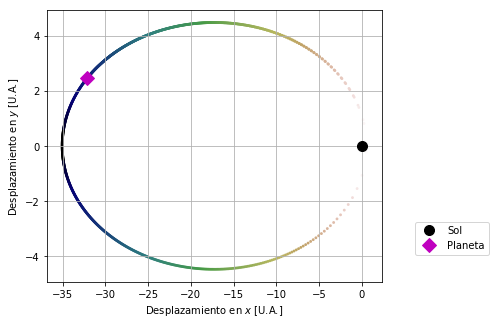

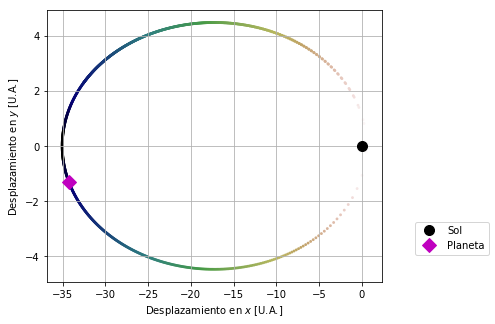

In [8]:
def plet(time=0):
    plt.figure(figsize=(6,5))
    x=xx[:,0]
    y=xx[:,2]
    z=time
    plt.scatter(xx[:,0], xx[:,2], c= xx[:,0] , s = 8, lw = 0, cmap=plt.cm.gist_earth)
    #plt.plot(z, x[int(time*(1/salto2))], 'ko', ms =10, label='Planeta 1')
    plt.plot(0, 0, 'ko', ms =10, label='Sol')
    #plt.plot(z, y[int(time*(1/salto2))], 'mD', ms =10, label='Planeta 2')
    plt.plot(x[int(time*(1/salto2))], y[int(time*(1/salto2))], 'mD', ms =10, label='Planeta')
    plt.legend(loc=(1.1, 0.1))
    plt.xlabel('Desplazamiento en $x$ [U.A.]')
    plt.ylabel('Desplazamiento en $y$ [U.A.]')
    plt.grid()
interact_manual(plet, time = (0,t2,salto2));
plt.show()

In [11]:
# 2 Partículas
# Se define arreglo de ecuaciones para un sistema binario de estrellas con masa igual a la del Sol
m1, m2 = 1, 1
def mov2 (x,t):
    x1, dx1, y1, dy1, x2, dx2, y2, dy2 = x
    return (dx1, -G*m2*(x1-x2)/((y1-y2)**2+(x1-x2)**2)**(3/2), dy1, -G*m2*(y1-y2)/((y1-y2)**2+(x1-x2)**2)**(3/2),
           dx2, -G*m1*(x2-x1)/((y1-y2)**2+(x1-x2)**2)**(3/2), dy2, -G*m1*(y2-y1)/((y1-y2)**2+(x1-x2)**2)**(3/2))

In [12]:
x0= (1, 0, 0, 0.05, -1, 0, 0, -0.05) # Condiciones iniciales de ambas partículas.
t3=10 # Tercera condición de tiempo
t = np.linspace(0, t3, 1000)

xx = odeint(mov2, x0, t)
salto3= t3/1000

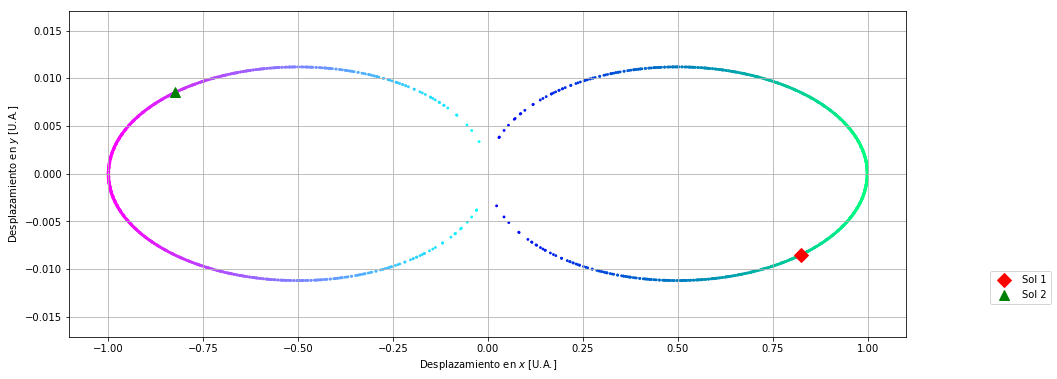

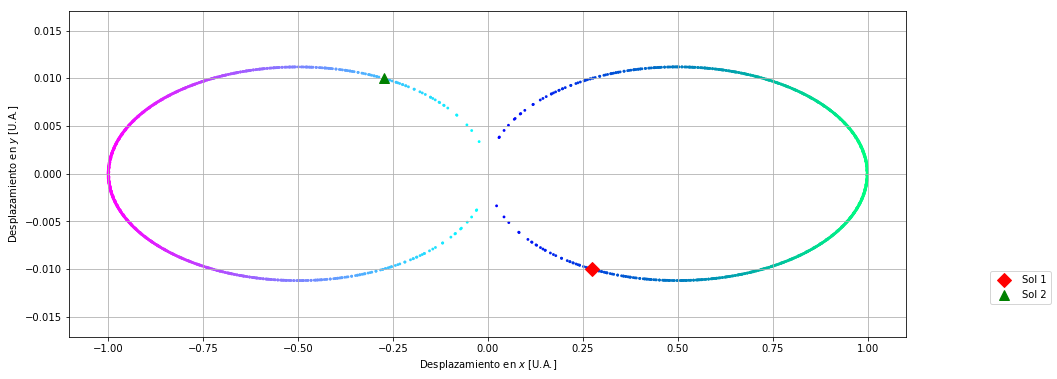

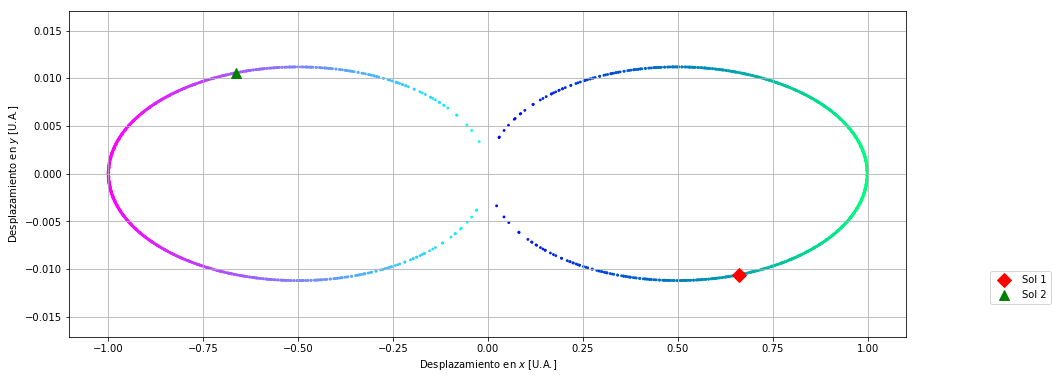

In [15]:
def plot3(time=0):
    plt.figure(figsize=(15,6))
    x1=xx[:,0]
    y1=xx[:,2]
    x2=xx[:,4]
    y2=xx[:,6]
    plt.scatter(x1, y1, c= xx[:,0] , s = 8, lw = 0, cmap=plt.cm.winter) # Gráfica 1era órbita
    plt.scatter(x2, y2, c= xx[:,0] , s = 8, lw = 0, cmap=plt.cm.cool) # Gráfica 2da órbita
    plt.plot(x1[int(time*(1/salto3))], y1[int(time*(1/salto3))], 'rD', ms =10, label='Sol 1') #Diamante del planeta 1
    plt.plot(x2[int(time*(1/salto3))], y2[int(time*(1/salto3))], 'g^', ms =10, label='Sol 2') #Triangulo del planeta 2
    plt.legend(loc=(1.1, 0.1))
    plt.xlabel('Desplazamiento en $x$ [U.A.]')
    plt.ylabel('Desplazamiento en $y$ [U.A.]')
    plt.grid()
interact_manual(plot3, time = (0,t3,salto3));

<font color = purple>

## 5. Conclusiones

<font color = black>

* El objetivo del proyecto fue describir distintos tipos de sistemas planetarios, los cuales son mencionados en los objetivos específicos, para poder analizar la trayectoria que describe cada uno. A lo largo del desarrollo del trabajo realizamos las simulaciones correspondientes con sus respectivas gráficas, cumpliendo así el objetivo. Los sistemas simulados fueron:
  * Un sol y un cuerpo en una dimensión, con el sol fijo en el origen.
  * Un sol y un cuerpo en dos dimensiones, nuevamente con el sol fijo en el origen.
  * Dos soles en dos dimensiones. 
  
* Logramos integrar los conocimientos adquiridos previamente para utilizar la función *odeint* y resolver sistemas de ecuaciones diferenciales acopladas de segundo orden. 

* En una primera versión del trabajo, el código tenía un exceso de trabajo utilizando las constantes y parámetros en unidades del sistema internacional; por lo tanto, decidimos cambiar a un sistema de unidades más conveniente para el tipo de problema que estábamos tratando, logrando resultados positivos. 

* Los resultados obtenidos coinciden con los esperados con base en los conocimientos previos que teníamos. 


<font color = purple>

## 6. Referencias

<font color = black>


* Baker, J., & Ribera de Madariaga, B. (2007). *50 cosas que hay que saber sobre física.* Barcelona: Ariel.

* Flores, R. (2009). *El concepto del movimiento planetario a través de la historia.* Fisicayquimicaenflash.es. Recuperado el 24 de septiembre del 2017, de: http://fisicayquimicaenflash.es/eso/4eso/dinamica/dinam09.html

* Papadatos, K. (s.f.). *The equations of planetary motion and their solution.* Recuperado el 24 de septiembre del 2017, de: https://gsjournal.net/Science-Journals/Research%20Papers-Astrophysics/Download/3763

* Stern, D. (2005). *Las Tres Leyes de Kepler del Movimiento Planetario.* Www-istp.gsfc.nasa.gov. Recuperado el 24 de septiembre del 2017, de: https://www-istp.gsfc.nasa.gov/stargaze/Mkepl3laws.htm



Github:
    https://github.com/AndreaOrtizM/proyecto_modulo1